In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# create dataframe with number of executors and corresponding execution times and sample fractions
sample_fractions = ['1%', '1%', '1%', '1%','1%','3%', '3%', '3%', '3%', '3%' ,'5%', '5%', '5%', '5%', '5%']
num_executors   = [8, 16, 24, 30, 32, 8, 16, 24, 30, 32, 8, 16, 24, 30, 32]
exec_times      = [7054513,6567020,8435410,8444292,6647011,27143936,25250521,25236527,25376417,25719649,44117928,37520908,33523939,42390198,35745123]

data = pd.DataFrame({
    "sample_fraction": sample_fractions,
    "num_executors": num_executors,
    "executorCPUtime": exec_times
})

df = pd.DataFrame(data)
df

,sample_fraction,num_executors,executorCPUtime
0,1%,8,7054513
1,1%,16,6567020
2,1%,24,8435410
3,1%,30,8444292
4,1%,32,6647011
5,3%,8,27143936
6,3%,16,25250521
7,3%,24,25236527
8,3%,30,25376417
9,3%,32,25719649


In [30]:
# compute speed up (T(8)/T(n)) i.e. 8 is our baseline
# get baseline for each sample fraction
baseline = df[df["num_executors"] == 8][["sample_fraction", "executorCPUtime"]]
baseline = baseline.rename(columns={"executorCPUtime": "T8"})

# merge to dataframe
df = df.merge(baseline, on="sample_fraction", how="left")


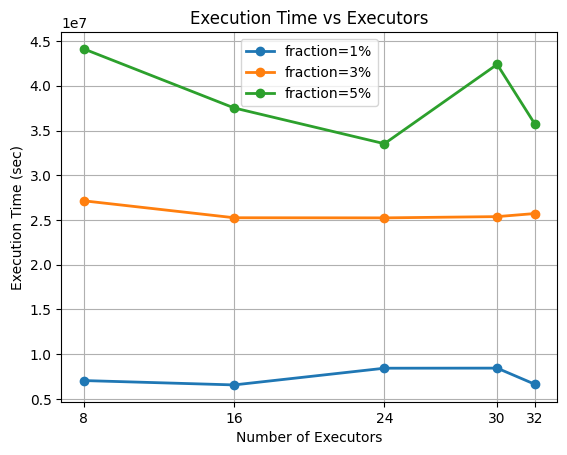

In [31]:

# set the x-axis ticks you want
plt.xticks([8, 16, 24, 30, 32])

# plot each sample_fraction group with a marker
for frac, g in df.groupby("sample_fraction"):
    plt.plot(
        g["num_executors"],
        g["executorCPUtime"],
        marker="o",             # add points
        linewidth=2,
        label=f"fraction={frac}"
    )

plt.xlabel("Number of Executors")
plt.ylabel("Execution Time (sec)")
plt.title("Execution Time vs Executors")
plt.legend()
plt.grid(True)
plt.show()    # no grid
